In [150]:
import pandas as pd
import numpy as np 
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:
x,y=make_moons(n_samples=500,noise=0.2)

In [152]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [153]:
data=pd.DataFrame(df)

In [154]:
data

,x1,x2,y
0,0.512717,-0.168545,1
1,-0.342023,0.491150,0
2,0.825875,-0.348715,1
3,0.576822,-0.386867,1
4,0.386606,0.364790,0
...,...,...,...
495,0.508707,0.606620,0
496,0.425519,0.676200,0
497,0.560385,0.210813,0
498,-0.770086,0.587192,0


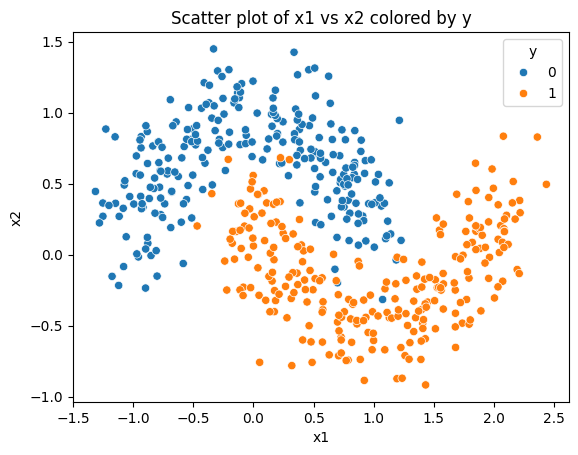

In [155]:
sns.scatterplot(x="x1", y="x2", data=data, hue="y")
plt.title("Scatter plot of x1 vs x2 colored by y")
plt.show()

In [164]:
x_a = data.iloc[:, :-1]  # All columns except the last one
y_a = data['y']          # Target column


In [165]:
from sklearn.model_selection import train_test_split

In [166]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)


In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [168]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

train_accuracy = dt.score(x_train, y_train) * 100
test_accuracy = dt.score(x_test, y_test) * 100

print(f"✅ Training Accuracy: {train_accuracy:.2f}%")
print(f"🧪 Testing Accuracy: {test_accuracy:.2f}%")


✅ Training Accuracy: 100.00%
🧪 Testing Accuracy: 96.00%


In [169]:
from sklearn.svm import SVC

dt = SVC()
dt.fit(x_train, y_train)

train_accuracy = dt.score(x_train, y_train) * 100
test_accuracy = dt.score(x_test, y_test) * 100

print(f"✅ Training Accuracy: {train_accuracy:.2f}%")
print(f"🧪 Testing Accuracy: {test_accuracy:.2f}%")


✅ Training Accuracy: 97.25%
🧪 Testing Accuracy: 100.00%


In [170]:
from sklearn.naive_bayes import GaussianNB

dt = GaussianNB()
dt.fit(x_train, y_train)

train_accuracy = dt.score(x_train, y_train) * 100
test_accuracy = dt.score(x_test, y_test) * 100

print(f"✅ Training Accuracy: {train_accuracy:.2f}%")
print(f"🧪 Testing Accuracy: {test_accuracy:.2f}%")


✅ Training Accuracy: 87.00%
🧪 Testing Accuracy: 85.00%


# assemble learning 
# voting classifier

In [171]:
from sklearn.ensemble import VotingClassifier

In [173]:
li = [("dt1", DecisionTreeClassifier()), 
      ("svc", SVC()), 
      ("gaussian", GaussianNB())]

In [ ]:
vt=VotingClassifier(li)
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svc', SVC()),
                             ('gaussian', GaussianNB())])

In [175]:
vt.score(x_train,y_train)*100,vt.score(x_test,y_test)*100

(97.25, 96.0)